In [50]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers
import tensorflow.keras
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [51]:
features = pd.read_csv('temps.csv')

features.head()

,year,month,day,week,temp_2,temp_1,average,actual,friend
0,2019,1,1,Fri,45,45,45.6,45,29
1,2019,1,2,Sat,44,45,45.7,44,61
2,2019,1,3,Sun,45,44,45.8,41,56
3,2019,1,4,Mon,44,41,45.9,40,53
4,2019,1,5,Tues,41,40,46.0,44,41


In [62]:
print('数据维度', features.shape)

数据维度 (348, 14)


In [53]:
#处理时间数据
import datetime

# 分别得到年月日
years = features['year']
months = features['month']
days = features['day']

# datatime格式
dates = [str(int(year)) + '-' + str(int(month)) + '-' + str(int(day)) for year, month, day in zip(years, months, days)]
dates = [datetime.datetime.strptime(date, '%Y-%m-%d') for date in dates]


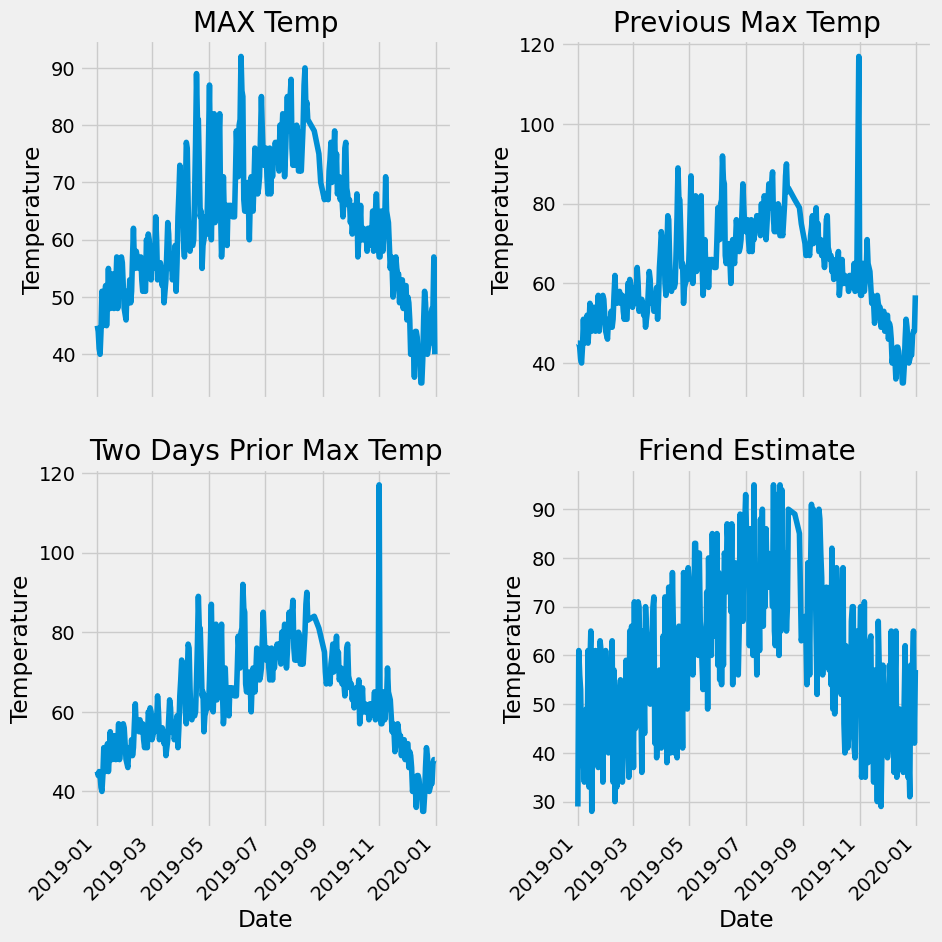

In [54]:
# 准备画图
# 指定默认风格
plt.style.use('fivethirtyeight')

# 设置布局
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2, figsize = (10, 10))
fig.autofmt_xdate(rotation = 45)

# 标签值
ax1.plot(dates, features['actual'])
ax1.set_xlabel('');ax1.set_ylabel('Temperature');ax1.set_title('MAX Temp')

# 昨天
ax2.plot(dates, features['temp_1'])
ax2.set_xlabel('');ax2.set_ylabel('Temperature');ax2.set_title('Previous Max Temp')

# 前天
ax3.plot(dates, features['temp_2'])
ax3.set_xlabel('Date');ax3.set_ylabel('Temperature');ax3.set_title('Two Days Prior Max Temp')

# 我的逗逼朋友
ax4.plot(dates, features['friend'])
ax4.set_xlabel('Date');ax4.set_ylabel('Temperature');ax4.set_title('Friend Estimate')

plt.tight_layout(pad=2)


In [55]:
# 对星期字符串做预处理
features = pd.get_dummies(features)
features.head(5)

,year,month,day,temp_2,temp_1,average,actual,friend,week_Fri,week_Mon,week_Sat,week_Sun,week_Thurs,week_Tues,week_Wed
0,2019,1,1,45,45,45.6,45,29,1,0,0,0,0,0,0
1,2019,1,2,44,45,45.7,44,61,0,0,1,0,0,0,0
2,2019,1,3,45,44,45.8,41,56,0,0,0,1,0,0,0
3,2019,1,4,44,41,45.9,40,53,0,1,0,0,0,0,0
4,2019,1,5,41,40,46.0,44,41,0,0,0,0,0,1,0


把数据中x和y分开

In [56]:
# 提取y
labels = np.array(features['actual'])

# 去除y
features = features.drop('actual', axis=1)

# 名字单独保存一下
feature_list = list(features.columns)

features = np.array(features)


In [63]:
features.shape

(348, 14)

数据标准化，不同属性数据差距过大

In [69]:
from sklearn import preprocessing
input_features = preprocessing.StandardScaler().fit_transform(features)
input_features.shape

(348, 14)

# 基于Keras构建网络模型
常用参数
* activation：激活函数的选择，一般常用ReLU
* kernel_initializer, bias_initializer：权重与偏置参数的初始化方法
* kernel_regularizer, bias_regularizer：要不要加入正则化
* inputs：输入，可以自己指定，也可以让网络自动选
* units：神经元个数

按顺序构造网络，从隐藏层开始构造，这里的Dense是全连接网络，卷积什么的其他网络可以查看TensorFlow的官方文档layers模块

In [86]:
model = tf.keras.Sequential()
model.add(layers.Dense(16))
model.add(layers.Dense(32))
model.add(layers.Dense(1))

配置网络，设置优化器、损失函数……

In [87]:
model.compile(optimizer=tf.keras.optimizers.SGD(0.001),
             loss='mean_squared_error')

训练
参数：
* x
* y
* validation_split:验证集的比例
* epochs:所有样本训练轮次
* batch_size:一次处理的样本数

In [88]:
model.fit(input_features, labels, validation_split=0.25, epochs=10, batch_size=64)

Epoch 1/10
5/5 [==============================] - 0s 32ms/step - loss: 4192.3862 - val_loss: 3376.5779
Epoch 2/10
5/5 [==============================] - 0s 9ms/step - loss: 1507.8601 - val_loss: 3410.8018
Epoch 3/10
5/5 [==============================] - 0s 10ms/step - loss: 182.7054 - val_loss: 3175.5984
Epoch 4/10
5/5 [==============================] - 0s 9ms/step - loss: 73.6204 - val_loss: 2454.6147
Epoch 5/10
5/5 [==============================] - 0s 10ms/step - loss: 62.9227 - val_loss: 2184.9670
Epoch 6/10
5/5 [==============================] - 0s 9ms/step - loss: 72.8595 - val_loss: 1519.0032
Epoch 7/10
5/5 [==============================] - 0s 10ms/step - loss: 101.1585 - val_loss: 1318.0424
Epoch 8/10
5/5 [==============================] - 0s 9ms/step - loss: 128.3709 - val_loss: 1053.4805
Epoch 9/10
5/5 [==============================] - 0s 9ms/step - loss: 46.9889 - val_loss: 753.3859
Epoch 10/10
5/5 [==============================] - 0s 9ms/step - loss: 56.7025 - val_loss:

In [91]:
input_features.shape

(348, 14)

In [89]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 16)                240       
                                                                 
 dense_16 (Dense)            (None, 32)                544       
                                                                 
 dense_17 (Dense)            (None, 1)                 33        
                                                                 
Total params: 817
Trainable params: 817
Non-trainable params: 0
_________________________________________________________________


更新初始方法，调参
初始化采用随机高斯分布

In [93]:
model = tf.keras.Sequential()
model.add(layers.Dense(16, kernel_initializer='random_normal'))
model.add(layers.Dense(32, kernel_initializer='random_normal'))
model.add(layers.Dense(1,kernel_initializer='random_normal'))

In [96]:
model.compile(optimizer=tf.keras.optimizers.SGD(0.001),
             loss='mean_squared_error')
model.fit(input_features, labels, validation_split=0.25, epochs=100, batch_size=64)

Epoch 1/100
5/5 [==============================] - 0s 33ms/step - loss: 4390.9873 - val_loss: 2872.2375
Epoch 2/100
5/5 [==============================] - 0s 9ms/step - loss: 4299.9604 - val_loss: 2794.2283
Epoch 3/100
5/5 [==============================] - 0s 9ms/step - loss: 4193.0825 - val_loss: 2693.3906
Epoch 4/100
5/5 [==============================] - 0s 9ms/step - loss: 4021.7405 - val_loss: 2513.0864
Epoch 5/100
5/5 [==============================] - 0s 10ms/step - loss: 3528.6709 - val_loss: 2302.9851
Epoch 6/100
5/5 [==============================] - 0s 9ms/step - loss: 819.6989 - val_loss: 2062.2368
Epoch 7/100
5/5 [==============================] - 0s 8ms/step - loss: 75.2143 - val_loss: 1703.6277
Epoch 8/100
5/5 [==============================] - 0s 9ms/step - loss: 73.0582 - val_loss: 1277.2825
Epoch 9/100
5/5 [==============================] - 0s 9ms/step - loss: 52.6519 - val_loss: 846.0634
Epoch 10/100
5/5 [==============================] - 0s 9ms/step - loss: 46.2439

5/5 [==============================] - 0s 9ms/step - loss: 37.0909 - val_loss: 50.4376
Epoch 83/100
5/5 [==============================] - 0s 7ms/step - loss: 40.0829 - val_loss: 37.2660
Epoch 84/100
5/5 [==============================] - 0s 8ms/step - loss: 26.7158 - val_loss: 41.0868
Epoch 85/100
5/5 [==============================] - 0s 9ms/step - loss: 29.1127 - val_loss: 37.8741
Epoch 86/100
5/5 [==============================] - 0s 9ms/step - loss: 25.1889 - val_loss: 52.1689
Epoch 87/100
5/5 [==============================] - 0s 8ms/step - loss: 34.0332 - val_loss: 42.6574
Epoch 88/100
5/5 [==============================] - 0s 8ms/step - loss: 26.5671 - val_loss: 49.5389
Epoch 89/100
5/5 [==============================] - 0s 8ms/step - loss: 27.3609 - val_loss: 69.9069
Epoch 90/100
5/5 [==============================] - 0s 9ms/step - loss: 59.2267 - val_loss: 40.2041
Epoch 91/100
5/5 [==============================] - 0s 9ms/step - loss: 24.2062 - val_loss: 59.7140
Epoch 92/100


加入正则惩罚项

In [103]:
model = tf.keras.Sequential()
model.add(layers.Dense(16, kernel_initializer='random_normal', kernel_regularizer=tf.keras.regularizers.l2(0.01)))
model.add(layers.Dense(32, kernel_initializer='random_normal', kernel_regularizer=tf.keras.regularizers.l2(0.01)))
model.add(layers.Dense(1,kernel_initializer='random_normal', kernel_regularizer=tf.keras.regularizers.l2(0.01)))

In [104]:
model.compile(optimizer=tf.keras.optimizers.SGD(0.001),
             loss='mean_squared_error')
model.fit(input_features, labels, validation_split=0.25, epochs=100, batch_size=64)

Epoch 1/100
5/5 [==============================] - 1s 36ms/step - loss: 4389.3149 - val_loss: 2868.1475
Epoch 2/100
5/5 [==============================] - 0s 9ms/step - loss: 4289.5576 - val_loss: 2778.4167
Epoch 3/100
5/5 [==============================] - 0s 9ms/step - loss: 4152.2231 - val_loss: 2639.8501
Epoch 4/100
5/5 [==============================] - 0s 9ms/step - loss: 3843.0598 - val_loss: 2398.5872
Epoch 5/100
5/5 [==============================] - 0s 9ms/step - loss: 1987.2727 - val_loss: 1777.3528
Epoch 6/100
5/5 [==============================] - 0s 9ms/step - loss: 168.4540 - val_loss: 1252.0583
Epoch 7/100
5/5 [==============================] - 0s 9ms/step - loss: 60.8164 - val_loss: 1190.1460
Epoch 8/100
5/5 [==============================] - 0s 9ms/step - loss: 264.8104 - val_loss: 726.0513
Epoch 9/100
5/5 [==============================] - 0s 10ms/step - loss: 38.8480 - val_loss: 728.2811
Epoch 10/100
5/5 [==============================] - 0s 9ms/step - loss: 104.791

5/5 [==============================] - 0s 8ms/step - loss: 24.9717 - val_loss: 62.0112
Epoch 83/100
5/5 [==============================] - 0s 8ms/step - loss: 32.7937 - val_loss: 60.2728
Epoch 84/100
5/5 [==============================] - 0s 8ms/step - loss: 28.8621 - val_loss: 51.0050
Epoch 85/100
5/5 [==============================] - 0s 8ms/step - loss: 36.8919 - val_loss: 43.3472
Epoch 86/100
5/5 [==============================] - 0s 8ms/step - loss: 28.7666 - val_loss: 47.5746
Epoch 87/100
5/5 [==============================] - 0s 8ms/step - loss: 31.5502 - val_loss: 44.4522
Epoch 88/100
5/5 [==============================] - 0s 8ms/step - loss: 24.9713 - val_loss: 46.8988
Epoch 89/100
5/5 [==============================] - 0s 8ms/step - loss: 42.1849 - val_loss: 46.4892
Epoch 90/100
5/5 [==============================] - 0s 9ms/step - loss: 28.4885 - val_loss: 42.6555
Epoch 91/100
5/5 [==============================] - 0s 8ms/step - loss: 27.5630 - val_loss: 44.8971
Epoch 92/100


预测结果

In [105]:
predict = model.predict(input_features)

11/11 [==============================] - 1s 1ms/step


In [106]:
predict.shape

(348, 1)

In [112]:
# 转换日期
dates = [str(int(year)) + '-' + str(int(month)) + '-' + str(int(day)) for year, month, day in zip(years, months, days)] 
dates = [datetime.datetime.strptime(date, '%Y-%m-%d') for date in dates]

# 创建一个表格来存日期和其对应的标签数值
true_data = pd.DataFrame(data = {'date':dates, 'actual':labels})

# 同理，再创建一个来存日期和其对应的模型预测值
months = features[:, feature_list.index('month')]
days = features[:, feature_list.index('day')]
years = features[:, feature_list.index('year')]

test_dates = [str(int(year)) + '-' + str(int(month)) + '-' + str(int(day)) for year, month, day in zip(years, months, days)] 

test_dates = [datetime.datetime.strptime(date, '%Y-%m-%d') for date in test_dates]

predictions_data = pd.DataFrame(data = {'date':test_dates, 'prediction':predict.reshape(-1)})


Text(0.5, 1.0, 'Actual and Predicted Values')

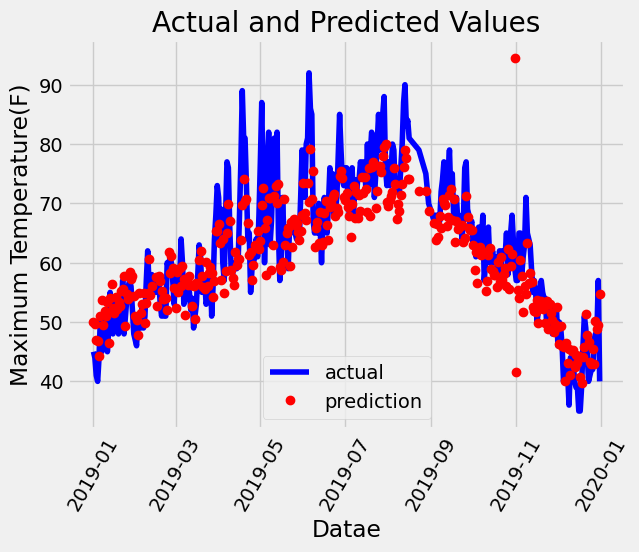

In [113]:
# 真实值
plt.plot(true_data['date'], true_data['actual'], 'b-', label='actual')

# 预测值
plt.plot(predictions_data['date'], predictions_data['prediction'], 'ro', label='prediction')
plt.xticks(rotation='60');
plt.legend()

# 图名
plt.xlabel('Datae');
plt.ylabel('Maximum Temperature(F)');
plt.title('Actual and Predicted Values')